In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,323 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,069 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 h

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [ ]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [ ]:
import findspark
findspark.init()

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=9f11ed1a503268202b26f9c74a059e800eed6a72807628f35d24117da5e2a227
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [ ]:
# import packages
import os
import re
import sys
print("start SPARK application")


start SPARK application


In [ ]:
# import libraries
import os
import re
import copy
import time
import datetime
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

%matplotlib inline

In [ ]:
event_data = "/content/mini_sparkify_event_data.json"
df = spark.read.json(event_data)
df.count()

286500

In [ ]:
pd.DataFrame(df.take(5), columns=df.columns).head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30


In [ ]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



**Number of distinct users:**

In [ ]:
df.select('userId').distinct().count()

226

**Logs Time frame:**

In [ ]:
df.agg(max(from_unixtime(col('ts')/1000).cast(DateType())),min(from_unixtime(col('ts')/1000).cast(DateType()))).collect()

[Row(max(CAST(from_unixtime((ts / 1000), yyyy-MM-dd HH:mm:ss) AS DATE))=datetime.date(2018, 12, 3), min(CAST(from_unixtime((ts / 1000), yyyy-MM-dd HH:mm:ss) AS DATE))=datetime.date(2018, 10, 1))]

**Distinct Values for Columns of Interest**

In [ ]:
df.select('page').distinct().collect()

[Row(page='Cancel'),
 Row(page='Submit Downgrade'),
 Row(page='Thumbs Down'),
 Row(page='Home'),
 Row(page='Downgrade'),
 Row(page='Roll Advert'),
 Row(page='Logout'),
 Row(page='Save Settings'),
 Row(page='Cancellation Confirmation'),
 Row(page='About'),
 Row(page='Submit Registration'),
 Row(page='Settings'),
 Row(page='Login'),
 Row(page='Register'),
 Row(page='Add to Playlist'),
 Row(page='Add Friend'),
 Row(page='NextSong'),
 Row(page='Thumbs Up'),
 Row(page='Help'),
 Row(page='Upgrade'),
 Row(page='Error'),
 Row(page='Submit Upgrade')]

In [ ]:
df.select('auth').distinct().collect()  

[Row(auth='Logged Out'),
 Row(auth='Cancelled'),
 Row(auth='Guest'),
 Row(auth='Logged In')]

In [ ]:
df.select('level').distinct().collect()

[Row(level='free'), Row(level='paid')]

In [ ]:
df.select('gender').distinct().collect()

[Row(gender='F'), Row(gender=None), Row(gender='M')]

In [ ]:
df.select('status').distinct().collect()

[Row(status=307), Row(status=404), Row(status=200)]

In [ ]:
df.select('method').distinct().collect()

[Row(method='PUT'), Row(method='GET')]

**Null Check**

In [ ]:
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId| song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
| 58392|   0|     8346|  8346|            0|    8346| 58392|    0|    8346|     0|   0|        8346|        0|58392|     0|  0|     8346|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+



**It is obvious that there is a pattern in the nulls**

In [ ]:
df.where("artist is null").show(10)

+------+----------+---------+------+-------------+--------+------+-----+--------------------+------+---------------+-------------+---------+----+------+-------------+--------------------+------+
|artist|      auth|firstName|gender|itemInSession|lastName|length|level|            location|method|           page| registration|sessionId|song|status|           ts|           userAgent|userId|
+------+----------+---------+------+-------------+--------+------+-----+--------------------+------+---------------+-------------+---------+----+------+-------------+--------------------+------+
|  null| Logged In|    Colin|     M|           54| Freeman|  null| paid|     Bakersfield, CA|   PUT|Add to Playlist|1538173362000|       29|null|   200|1538352905000|Mozilla/5.0 (Wind...|    30|
|  null| Logged In|    Micah|     M|           84|    Long|  null| free|Boston-Cambridge-...|   GET|    Roll Advert|1538331630000|        8|null|   200|1538353150000|"Mozilla/5.0 (Win...|     9|
|  null| Logged In|    Mi

In [ ]:
set(df.select('page').distinct().collect())-set(df.where("artist is null").select('page').distinct().collect())

{Row(page='NextSong')}

**We can see that artist,length and song are null whenever auth is LoggedOut or page is different than NextSong.**

In [ ]:
df.where("lastName is null").show(10)

+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+
|artist|      auth|firstName|gender|itemInSession|lastName|length|level|location|method| page|registration|sessionId|song|status|           ts|userAgent|userId|
+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+
|  null|Logged Out|     null|  null|          100|    null|  null| free|    null|   GET| Home|        null|        8|null|   200|1538355745000|     null|      |
|  null|Logged Out|     null|  null|          101|    null|  null| free|    null|   GET| Help|        null|        8|null|   200|1538355807000|     null|      |
|  null|Logged Out|     null|  null|          102|    null|  null| free|    null|   GET| Home|        null|        8|null|   200|1538355841000|     null|      |
|  null|Logged Out|     null|  nul

**We can see that firstName,lastName is null, userid string is EMPTY!(not null) when auth is LoggedOut.** I will cast user id as long so that it would be null instead of being empty, so that we can drop the logs without user id because user id will be our identifier for feature assembly.

In [ ]:
df.select('userId','gender','level','auth').groupby(['gender','level','auth']).count().show()

+------+-----+----------+------+
|gender|level|      auth| count|
+------+-----+----------+------+
|     F| free| Cancelled|     7|
|     F| paid| Logged In|124893|
|     M| paid| Logged In| 97509|
|  null| free|Logged Out|  2520|
|     F| free| Logged In| 29665|
|     F| paid| Cancelled|    13|
|     M| free| Logged In| 26035|
|  null| free|     Guest|    97|
|     M| free| Cancelled|    14|
|  null| paid|Logged Out|  5729|
|     M| paid| Cancelled|    18|
+------+-----+----------+------+



**It turns out that null gender is also tied to being Logged Out**

<Axes: xlabel='auth'>

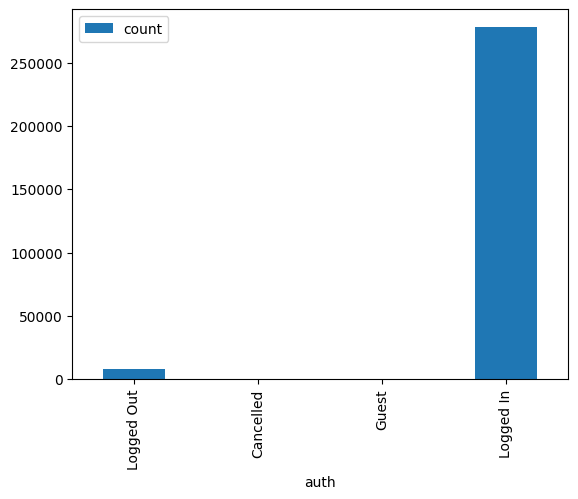

In [ ]:
auth_df = df.select('ts', 'auth').groupBy('auth').count().toPandas()
auth_df.index = auth_df.auth
auth_df.plot.bar()

**I have defined cleanse_data and label_data functions in the beginning of this notebook cleanse_data**: This function first removes special characters from StringType columns. Only ',' and '-' is not removed because we see that location field as an example can be split using ','. Couple of columns are generated based on ts, one is of timestamp type, the other one is datetype, which will be useful for aggregations and time based analysis. userId is cast to longtype so that we can recognize empty strings and then rows with null user id's are removed. The logging out records are of no use since they do not provide userid and other useful fields.It is not relevant to use for further analysis. Finally location field is split with ',' and only state abbreviation is retained for further analysis, as it is easy to use and has less unique values considering it will be encoded for modelling.

In [ ]:
df = cleanse_data(df)
df = label_data(df)
df = registered_days(df)

In [ ]:
df.select('userId','location','label').distinct().groupby('location','label').count().show()

+-----------+-----+-----+
|   location|label|count|
+-----------+-----+-----+
|         IN|    0|    2|
|      IL-MO|    1|    1|
|         MD|    0|    1|
|         VA|    0|    2|
|         AZ|    0|    5|
|      MN-WI|    0|    3|
|         AZ|    1|    2|
|      VA-NC|    0|    1|
|         OK|    0|    1|
|      RI-MA|    0|    2|
|         TX|    1|    3|
|      MA-NH|    0|    5|
|         LA|    0|    1|
|         AL|    0|    2|
|         NC|    0|    5|
|         SC|    0|    1|
|      MO-IL|    1|    1|
|         TX|    0|   13|
|PA-NJ-DE-MD|    1|    2|
|         UT|    0|    1|
+-----------+-----+-----+
only showing top 20 rows



In [ ]:
df.select('userId','gender','label').distinct().groupby('gender','label').count().show()

+------+-----+-----+
|gender|label|count|
+------+-----+-----+
|     M|    1|   32|
|     F|    0|   84|
|     F|    1|   20|
|     M|    0|   89|
+------+-----+-----+



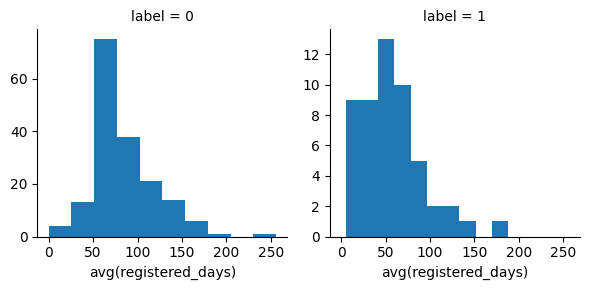

In [ ]:
register_df = df.groupBy(['userId', 'label']).avg('registered_days').toPandas()

# compare two groups of users
g = sns.FacetGrid(register_df, col="label", sharey=False)
g.map(plt.hist, "avg(registered_days)");

**Long time Registered users seems to be more loyal.**

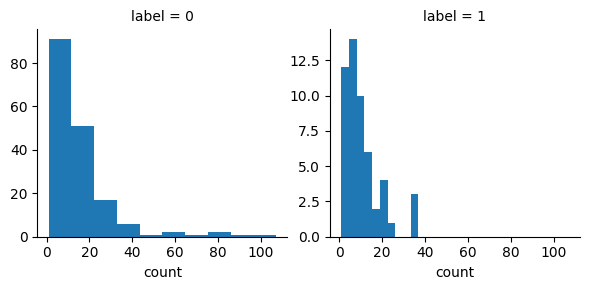

In [ ]:
sess_df = df.select('userId', 'label', 'sessionId').distinct().groupBy(['userId', 'label']).count().toPandas()

# compare two groups of users
g = sns.FacetGrid(sess_df, col="label", sharey=False)
g.map(plt.hist, "count");

**Number of distinct sessions per user is less for churn users**

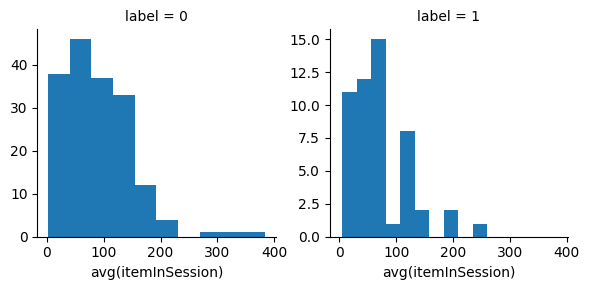

In [ ]:
item_df = df.groupBy(['userId', 'label']).avg('itemInSession').toPandas()

# compare two groups of users
g = sns.FacetGrid(item_df, col="label", sharey=False)
g.map(plt.hist, "avg(itemInSession)");

**Average number of items per user is less for churn users**

<Axes: xlabel='level'>

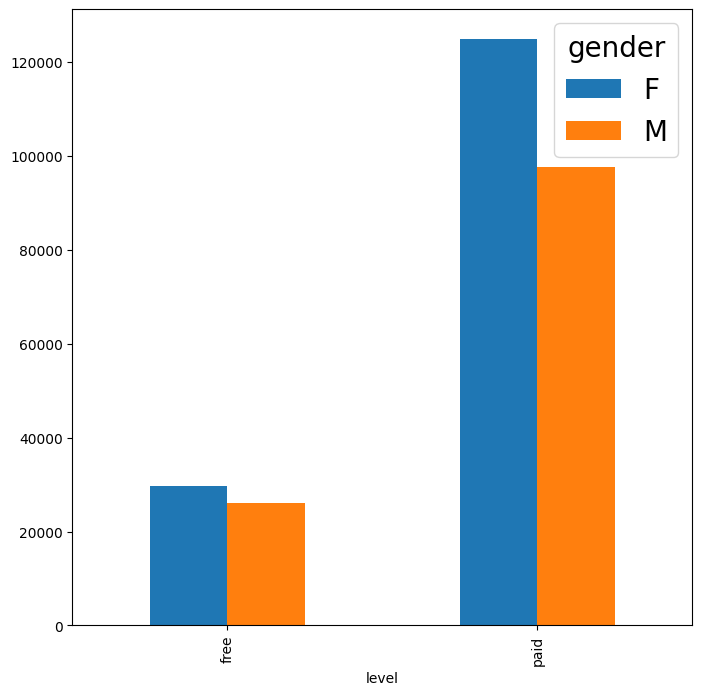

In [ ]:
df_count = df.select('userId','gender','level').groupby('gender','level').count().toPandas().sort_values(by='count')
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
plt.rcParams["font.size"] = "20"
df_count.pivot(index='level', columns='gender', values='count').plot(kind='bar', ax=ax)
# plt.savefig('gender_level.png')

<Axes: xlabel='label'>

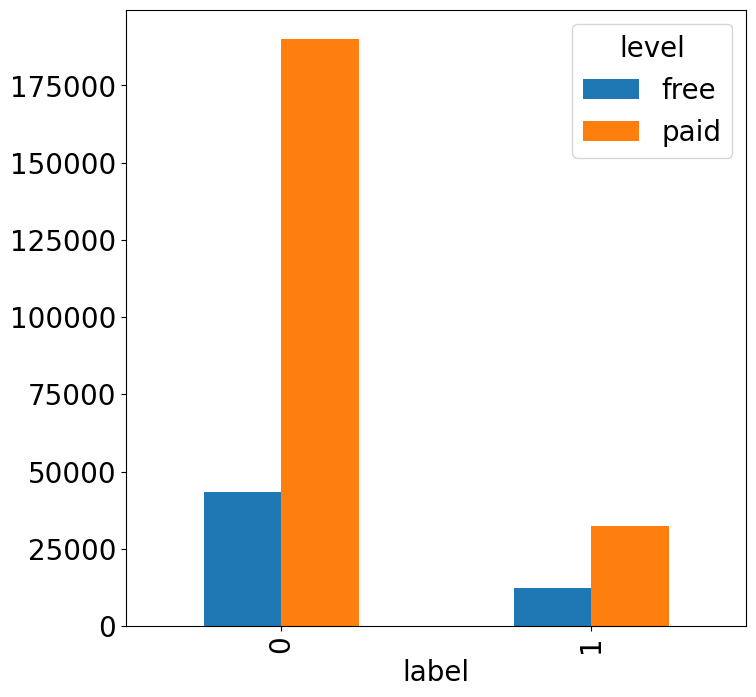

In [ ]:
df_count_ = df.select('userId','level','label').groupby('level','label').count().toPandas().sort_values(by='count')
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
plt.rcParams["font.size"] = "20"
df_count_.pivot(index='label', columns='level', values='count').plot(kind='bar', ax=ax)
# plt.savefig('label_level.png')

We can see that Female customers use Sparkify actively and paid customers are active more than free users. From the above plot we can conclude that paid customers churn more than free tier users. (label=1 churn)

In [ ]:
!pip install pyspark.ml.feature

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyspark.ml.feature (from versions: none)
ERROR: No matching distribution found for pyspark.ml.feature


<Axes: xlabel='location'>

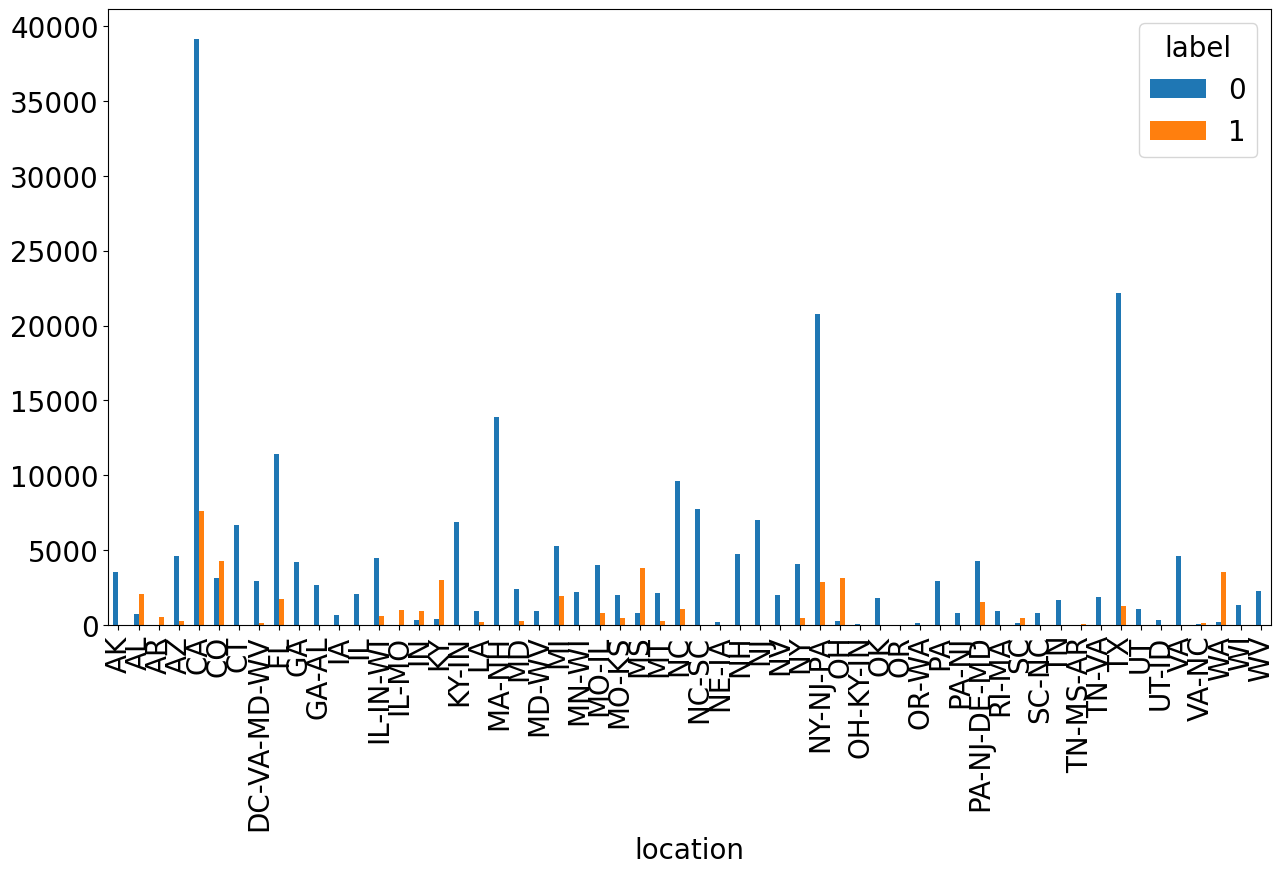

In [ ]:
df_state_count_ = df.select('userId','location','label').groupby('location','label').count().toPandas().sort_values(by='count')
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
df_state_count_.pivot(index='location', columns='label', values='count').plot(kind='bar', ax=ax)
# plt.savefig('state_churn.png')
#Churn Non-Churn Counts per State